# Name: Sunil Pradhan

## Project: Pet Classification Model Using CNN

### OBJECTIVE-
You are provided with a collection of images of pets, that is, cats and dogs. These images are of different sizes with varied lighting conditions and they should be used as inputs for your model.You are expected to write the code for CNN image classification model using TensorFlow that trains on the data and calculates the accuracy score on the test data. 

In [1]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_img_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [4]:
train=train_img_gen.flow_from_directory("E:/SIMPLILEARN/Deep Learning/Project/3/Dataset/train",
                                  target_size=(256,256),batch_size=32,class_mode="binary")

Found 40 images belonging to 2 classes.


In [5]:
train.filenames[0]

'cats\\1.jpg'

In [6]:
train.filenames[25]

'dogs\\14.jpg'

In [7]:
train.image_shape

(256, 256, 3)

In [8]:
train.num_classes

2

In [9]:
train.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
train.class_indices

{'cats': 0, 'dogs': 1}

In [11]:
from tensorflow.keras.preprocessing.image import load_img

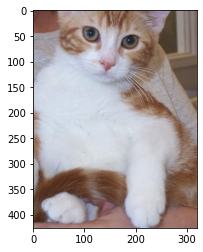

In [12]:
img1=load_img("E:/SIMPLILEARN/Deep Learning/Project/3/Dataset/train/cats/9.jpg")
import matplotlib.pyplot as plt
plt.imshow(img1)

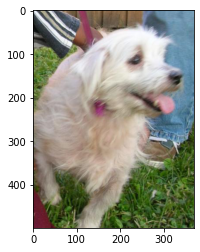

In [13]:
img2=load_img("E:/SIMPLILEARN/Deep Learning/Project/3/Dataset/train/dogs/9.jpg")
plt.imshow(img2)

In [14]:
test_img_gen=ImageDataGenerator(rescale=1./255)
test=test_img_gen.flow_from_directory("E:/SIMPLILEARN/Deep Learning/Project/3/Dataset/test",
                                  target_size=(256,256),batch_size=32,class_mode="binary")

Found 20 images belonging to 2 classes.


In [15]:
test.class_indices

{'cats': 0, 'dogs': 1}

In [16]:
test.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [18]:
model=Sequential()

In [19]:
model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",input_shape=[256,256,3]))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

In [20]:
model.add(Conv2D(filters=64,kernel_size=(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(units=32,activation="relu"))
model.add(Dropout(0.4,seed=25))

In [23]:
model.add(Dense(1,activation="softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 238144)            0         
                                                                 
 dense (Dense)               (None, 32)                7

In [25]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [26]:
model.fit(train,validation_data=test,epochs=100)

Epoch 1/100
2/2 [==============================] - 6s 2s/step - loss: 1.1536 - accuracy: 0.5000 - val_loss: 0.8550 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 6s 5s/step - loss: 1.0336 - accuracy: 0.5000 - val_loss: 0.7410 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 6s 5s/step - loss: 0.7228 - accuracy: 0.5000 - val_loss: 0.7117 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 6s 2s/step - loss: 0.6995 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 7s 2s/step - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6772 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 6s 5s/step - loss: 0.7278 - accuracy: 0.5000 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 6s 2s/step - loss: 0.7355 - accuracy: 0.5000 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 8/100
2/2 [=================

In [27]:
model.fit(train,validation_data=test,epochs=200)

Epoch 1/200
2/2 [==============================] - 6s 5s/step - loss: 0.0098 - accuracy: 0.5000 - val_loss: 2.2855 - val_accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 6s 2s/step - loss: 0.0182 - accuracy: 0.5000 - val_loss: 2.4627 - val_accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 6s 2s/step - loss: 0.0203 - accuracy: 0.5000 - val_loss: 2.5640 - val_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 6s 5s/step - loss: 0.0069 - accuracy: 0.5000 - val_loss: 2.6806 - val_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 6s 5s/step - loss: 0.0352 - accuracy: 0.5000 - val_loss: 2.7620 - val_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 6s 5s/step - loss: 0.0180 - accuracy: 0.5000 - val_loss: 2.6942 - val_accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 6s 5s/step - loss: 0.0054 - accuracy: 0.5000 - val_loss: 2.6230 - val_accuracy: 0.5000
Epoch 8/200
2/2 [=================

In [28]:
model.fit(train,validation_data=test,epochs=300)

Epoch 1/300
2/2 [==============================] - 6s 2s/step - loss: 7.4758e-04 - accuracy: 0.5000 - val_loss: 2.8581 - val_accuracy: 0.5000
Epoch 2/300
2/2 [==============================] - 6s 5s/step - loss: 0.0035 - accuracy: 0.5000 - val_loss: 2.9383 - val_accuracy: 0.5000
Epoch 3/300
2/2 [==============================] - 6s 2s/step - loss: 0.0027 - accuracy: 0.5000 - val_loss: 3.0183 - val_accuracy: 0.5000
Epoch 4/300
2/2 [==============================] - 6s 2s/step - loss: 0.0029 - accuracy: 0.5000 - val_loss: 3.1154 - val_accuracy: 0.5000
Epoch 5/300
2/2 [==============================] - 6s 5s/step - loss: 8.3303e-04 - accuracy: 0.5000 - val_loss: 3.2284 - val_accuracy: 0.5000
Epoch 6/300
2/2 [==============================] - 6s 2s/step - loss: 2.5976e-04 - accuracy: 0.5000 - val_loss: 3.3178 - val_accuracy: 0.5000
Epoch 7/300
2/2 [==============================] - 6s 5s/step - loss: 5.0184e-04 - accuracy: 0.5000 - val_loss: 3.4036 - val_accuracy: 0.5000
Epoch 8/300
2/2 [=

##           THANK YOU...!!!